In [75]:
from math import ceil, floor
import math
from io import StringIO
class BinaryHeap():
    """binary max-heap"""
    def __init__(self):
        self.minus_INF = -1 * 10e20
        self.A = []
        self.n = 0
    def heapify(self, i):
        self.n = len(self.A)
        left = 2*i + 1
        right = 2*i + 2
        largest = i
        if left < self.n and self.A[left] > self.A[largest]:
            largest = left
        if right < self.n and self.A[right] > self.A[largest]:
            largest = right
        if largest != i:
            self.A[i], self.A[largest] = self.A[largest], self.A[i] 
            self.heapify(largest)
    def insert(self, x):
        self.A.append(x)
        self.n = len(self.A)
        i = self.n - 1
        parent = floor((i-1)/2)
        while i != 0 and self.A[i] > self.A[parent]:
            self.A[i], self.A[parent] = self.A[parent], self.A[i] 
            i = parent
            parent = floor((i-1)/2)
    def get_max(self):
        return self.A[0]
    def extract_max(self):
        # если куча не пустая
        self.n = len(self.A)
        if self.A:
            res = self.A[0]
            if self.n != 1:
                self.A[0] = self.A.pop()
                self.heapify(0)
            else:
                self.A.pop()
            return res
    def show_tree(self, total_width=60, fill=' '):
        """Pretty-print a tree.
        total_width depends on your input size"""
        print(self.A)
        output = StringIO()
        last_row = -1
        for i, n in enumerate(self.A):
            if i:
                row = int(floor(math.log(i+1, 2)))
            else:
                row = 0
            if row != last_row:
                output.write('\n')
            columns = 2**row
            col_width = int(floor((total_width * 1.0) / columns))
            output.write(str(n).center(col_width, fill))
            last_row = row
        print (output.getvalue())
        print ('-' * total_width)

### сравним скорость операций с обычным списком

In [102]:
import random
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt

In [123]:
heap_time = []
list_time = []
ns = np.arange(100,10000,100)
for n in ns:
    heap_tmp = []
    list_tmp = []
    for _ in range(100):
        query = [random.randint(1,n) for k in range(n)]
        heap = BinaryHeap()
        for e in query:
            heap.insert(e)
        t_start = datetime.now()
        heap.extract_max()
        duration = datetime.now() - t_start
        heap_tmp.append(duration.microseconds)
        t_start = datetime.now()
        query.pop(query.index(max(query)))
        duration = datetime.now() - t_start
        list_tmp.append(duration.microseconds)
    heap_time.append(np.mean(heap_tmp))
    list_time.append(np.mean(list_tmp))

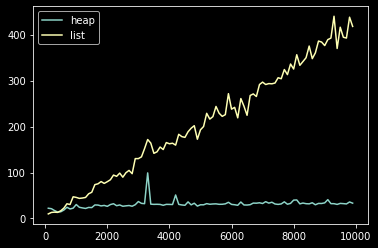

In [127]:
plt.plot(ns, heap_time, label='heap')
plt.plot(ns, list_time, label='list')
plt.legend()
plt.show()